# Rapport des résultats concernant le livrable 3

Table des matières : 
 - [Analyse du topic model](#topic-model)
    - [La visualisation pyldavis](#pyldavis)
    - [La matrice des distances de Jaccard inter-topic](#matricetopic)
    - [Cellule d'analyse d'un topic](#analyse-topic)
        - Le document les plus représentatifs 
        - Son importance dans le corpus
        - Les mots les plus représentatifs
     
- [Analyse des clusters](#cluster-model):
    - [La visualisation en deux dimensions](#cluster-vis)
    - [Les metriques liées à la clusterisation](#cluster-score) : 
        - silhouette_score
        - calinski_harabasz_score
        - davies_bouldin_score
    - [La matrice des distances cosinus inter-cluster](#cluster-matrice)
    - [Cellule d'analyse d'un clsuter](#analyse-cluster) :
        - Son importance dans le corpus (%)
        - Un nuage de mots 
        - Une liste des DCOs associés
        - La liste des topics associés
        - Le document le plus représentatif du cluster
        - Le document le moins représentatif du cluster 
    - [L'analyse des clusters les plus proches et les plus éloignés](#specific-cluster-analyse)
- [Analyse par document](#doc-analysis)
    - Distribution de thèmes associés
    - Cluster associé


In [4]:
import pandas as pd
import gensim
import pyLDAvis
import pyLDAvis.gensim
import os
import sklearn as sk 
import json
import numpy as np
import yaml 

import sys


with open('analyse_config.yaml', 'r') as stream:
    config_data = yaml.load(stream, Loader=yaml.FullLoader)
    
with open(os.path.join(os.path.dirname(os.getcwd()), 'config.yaml'), 'r') as stream:
    globale_config = yaml.load(stream, Loader=yaml.FullLoader)

path_mrv = globale_config['data']['mrv']['path']
data_mrv = pd.read_csv(path_mrv)


SAVE_PATH = config_data['analyse']['path']

path_to_regroupement = os.path.dirname(os.getcwd()) #os.path.dirname(os.path.dirname('.'))
sys.path.insert(1,os.path.join(path_to_regroupement, 'training/' ))

config_path = os.path.join(os.path.join(path_to_regroupement, 'training'),'training_config.yaml')


with open(config_path, 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)

import train_topic, train_cluster
import analysis, cluster_model_analysis, topic_model_analysis

data = pd.read_csv('/home/robin/Documents/DGS/data/declaration_mrv_complet.csv')


/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
%%time
name = config_data['analyse']['name']#'10_11_2020'# '19_10_2020_hdp_max_chunks_text_lem_kappa_0_01' #'06_10_2020' #config_data['analyse']['name']
# Loading
topicmodel = train_topic.TopicModel(name, config['topic'], 
                                        save_dir=os.path.join(SAVE_PATH, name))
topicmodel.load(name)

cluster_name = name #'06_10_2020_agglomerative_col_only'#name

clustermodel = train_cluster.ClusterModel(cluster_name, config['cluster'],
                                        save_dir=os.path.join(SAVE_PATH, cluster_name))
clustermodel.topicmodel = topicmodel
clustermodel.load(cluster_name)

topicAnalysis = topic_model_analysis.topicModelAnalysis(topicmodel)


clusterAnalysis = cluster_model_analysis.clusterModelAnalysis(clustermodel)



/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2020-11-25 15:02:15,003 - ClusterModel - INFO - train_cluster - load -  Loading from /home/robin/Documents/DGS/Annexe/L3/26_10_2020_text_lem/cluster/26_10_2020_text_lem
2020-11-25 15:02:15,009 - ClusterModel - INFO - train_cluster - load -  loaded object from /home/robin/Documents/DGS/Annexe/L3/26_10_2020_text_lem/cluster/26_10_2020_text_lem.sav
CPU times: user 629 ms, sys: 234 ms, total: 863 ms
Wall time: 870 ms


In [26]:
for elt in clustermodel.model.cluster_centers_.tolist().index() :
    print(elt)

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TypeError: index expected at least 1 argument, got 0

In [12]:
clustermodel.model.copy_x

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



True

In [9]:
clustermodel.model.n_clusters

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



150

## 1. Analyse du topic model <a class="anchor" id="topic-model"></a>

### 1.1 Visualisation globale via la bibliothèque pyLDAvis <a class="anchor" id="pyldavis"></a>

In [3]:
pyLDAvis.enable_notebook()
topicAnalysis.plot_lda_viz()

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### 1.2 La matrice des distances de Jaccard inter-topic  <a class="anchor" id="matricetopic"></a>

In [7]:
topicmodel.get_coherence_score()

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



-4.497666396654504

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



La carte des distances de Jaccard inter-topic se presente ainsi : 


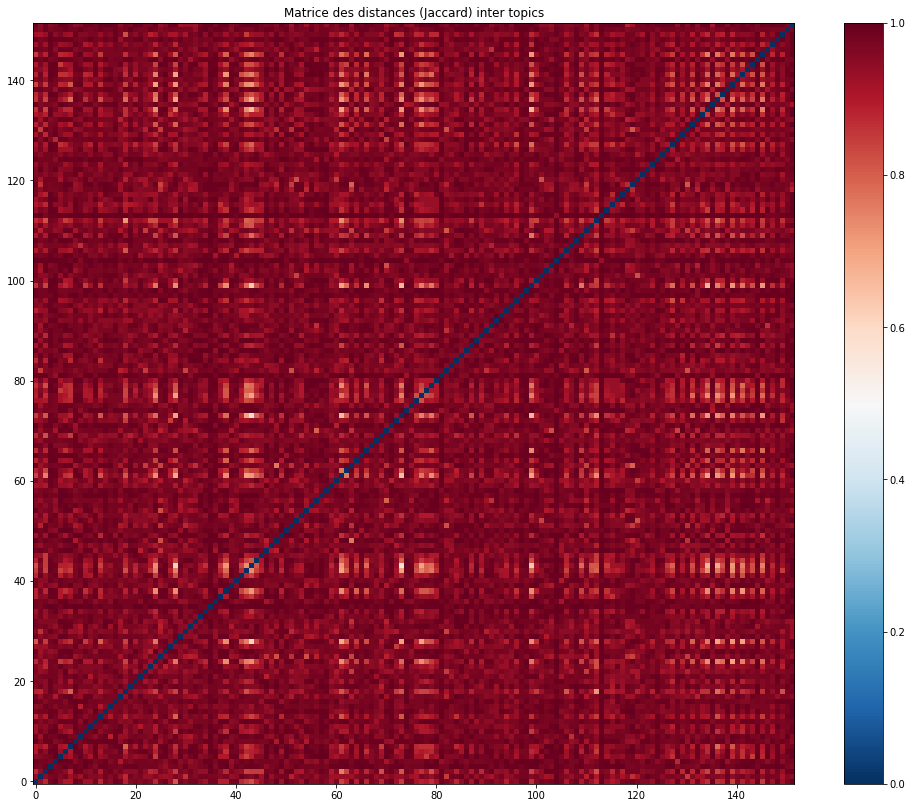

In [10]:
print('La carte des distances de Jaccard inter-topic se presente ainsi : ')
topicAnalysis.plot_topic_mat()

### 1.3 Analyse  Topic  <a class="anchor" id="analyse-topic"></a>

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analyse du Topic 1 représentant 3.61% du corpus
------------------------
Documents les plus représentatifs: 
------------------------

-----------
 Document 1 : 
 Numero de déclaration : R1715263
 DCO :  IMHE : CARTE DE CONTROLE PRETRANSFUSIONNEL
 Description incident : 
















Test AB test Card 
  Etat patient : 

Aucune manifestation clinique ou biologique
-----------
 Document 2 : 
 Numero de déclaration : R1716238
 DCO :  IMHE : CARTE DE CONTROLE PRETRANSFUSIONNEL
 Description incident : 






















Gravité potentielle 
  Etat patient : 


Aucune conséquence
-----------
 Document 3 : 
 Numero de déclaration : R1811995
 DCO :  TOUTES LES DCO
 Description incident : 
Absence de date de péremption sur lemballage carton et sur le sachet de conditionnement primaire des canules daspiration (voir photos ci-jointes). 
  Etat patient : 
Risque d'utiliser une canule d'aspiration non stérile.
------------------------
Nuage de mot des termes associés au topic:


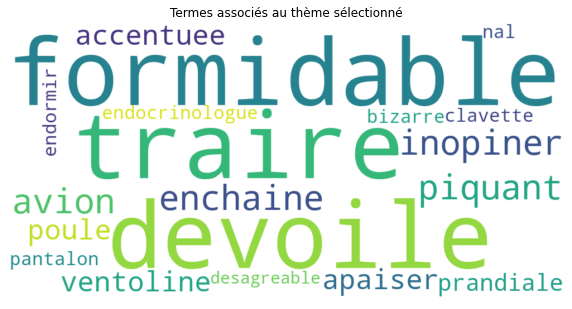

CPU times: user 6.84 s, sys: 142 ms, total: 6.98 s
Wall time: 6.67 s


In [5]:
%%time 
topic_number = 1# Entre 1 et 151
analysis.plotTopicAnalysis(topic_number, topicmodel,clustermodel,n_doc=3) #n_doc varie entre 1 et 3

## 2. Analyse du modèle des clusters <a class="anchor" id="cluster-model"></a>

### 2.1 Visualisation des centres des clusters via une pca en 2 dimensions <a class="anchor" id="cluster-vis"></a>



In [17]:
%%time
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
clusterAnalysis.plot_cluster(topicmodel)

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CPU times: user 564 ms, sys: 288 ms, total: 852 ms
Wall time: 438 ms


### 2.2 Présentation des métriques pour la clusterisation <a class="anchor" id="cluster-score"></a>

In [10]:
%%time 
clusterAnalysis.print_score(X = topicmodel.doc_topic_mat.iloc[:,:topicmodel.model.num_topics-1].values)

Le score silhouette est de:  -0.05533364
Le score calinski harabasz est de: 23.562571135478073
Le score de davies bouldin  est de 13.499341971709727
CPU times: user 4min 5s, sys: 1min 18s, total: 5min 23s
Wall time: 1min 41s


### 2.3 Analyse de la matrice des distances cosinus inter-cluster <a class="anchor" id="cluster-matrice"></a>

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CPU times: user 420 ms, sys: 3.98 ms, total: 424 ms
Wall time: 434 ms


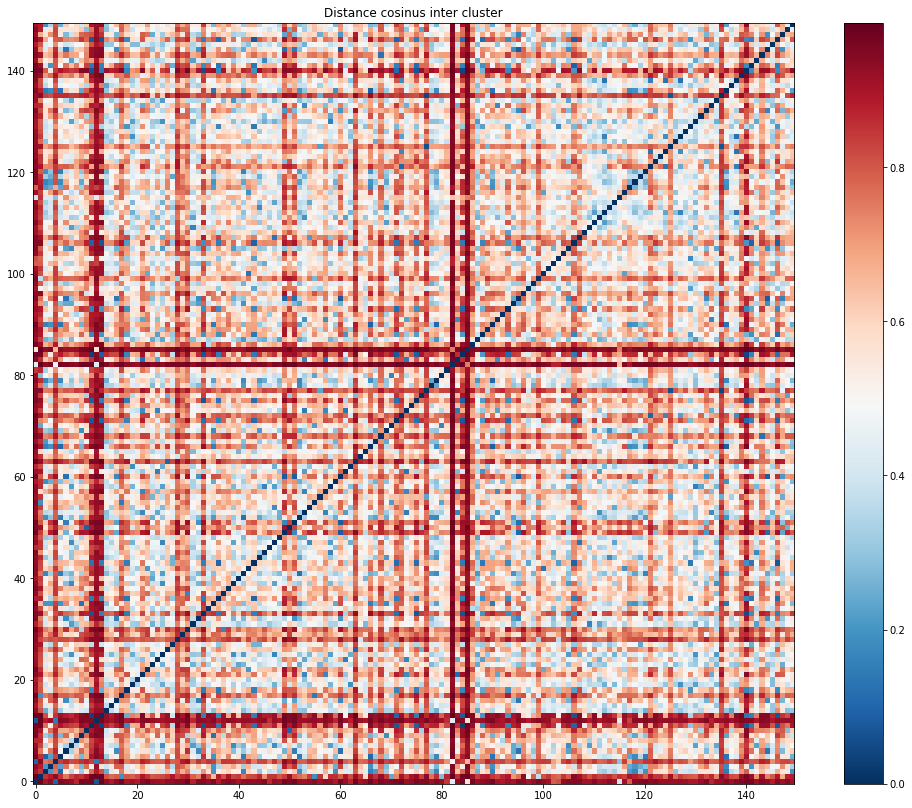

In [14]:
%%time 
clusterAnalysis.plot_dist_mat(topicmodel)

### 2.4 Analyse cluster <a class="anchor" id="analyse-cluster"></a>

/home/robin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



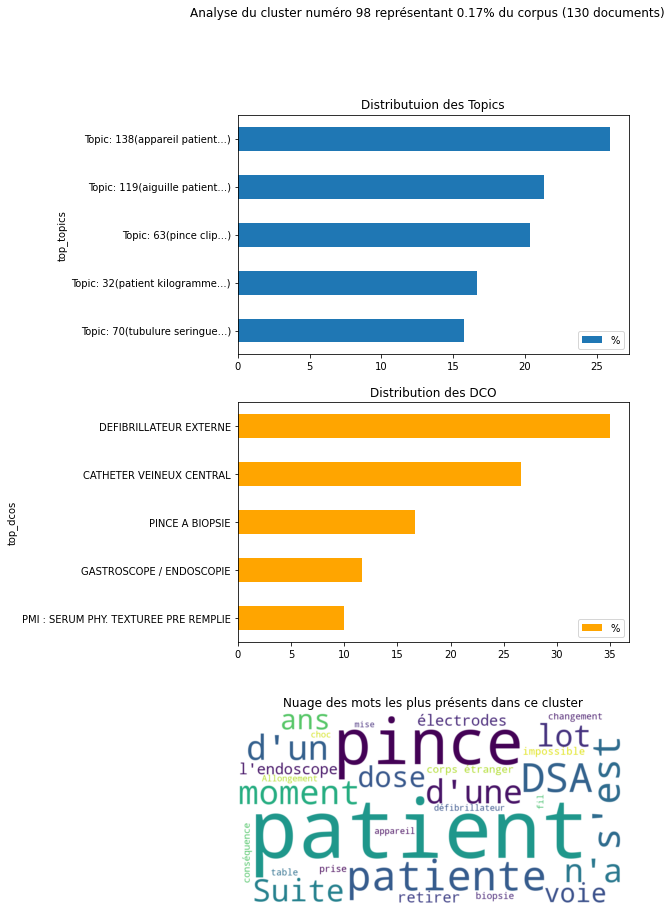

------------------------
Document le plus représentatif du cluster sélectionné
------------------------
Numero de déclaration : R1717784
 DCO :  INSTRUMENTATION ENDOSCOPIQUE / ENDOSCOPIE
 Description incident : 
Patient LAV- sexe féminin- 52 ans -58 kg.

Au moment de la saisie de la prothèse biliaire en place chez la patiente, la pince a claqué dans les mains et ne pouvait plus se renfermer.
Il a fallu ressortir totalement l'endoscope : pince ouverte dans l'intestin, l'estomac et l'sophage de la patiente, fermer la pince en appuyant dessus manuellement pour pouvoir l'extraire de l'appareil. 
  Etat patient : 
Prise de risque au retrait de l'endoscope avec le dispositif ouvert.
------------------------
------------------------
Document le moins représentatif du cluster sélectionné
------------------------
Numero de déclaration : R2001428
 DCO :  IMMUNOLOGIE : HLA - ANTIGENE OU ANTICORPS ANTI - HLA
 Description incident : 
Réalisation d'une série NGS de 96 échantillons la semaine du 20 

In [15]:
%%time
cluster = 98
analysis.plotClusterAnalysis(cluster, topicmodel,clustermodel)

### 2.4 Analyse comparative de cluster 2 à 2 <a class="anchor" id="specific-cluster-analyse"></a>

#### 2.4.1 Analyse des deux clusters les plus éloignés

 Les deux clusters les plus éloignés sont le cluster  22  et le cluster 43


/home/robin/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.

/home/robin/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



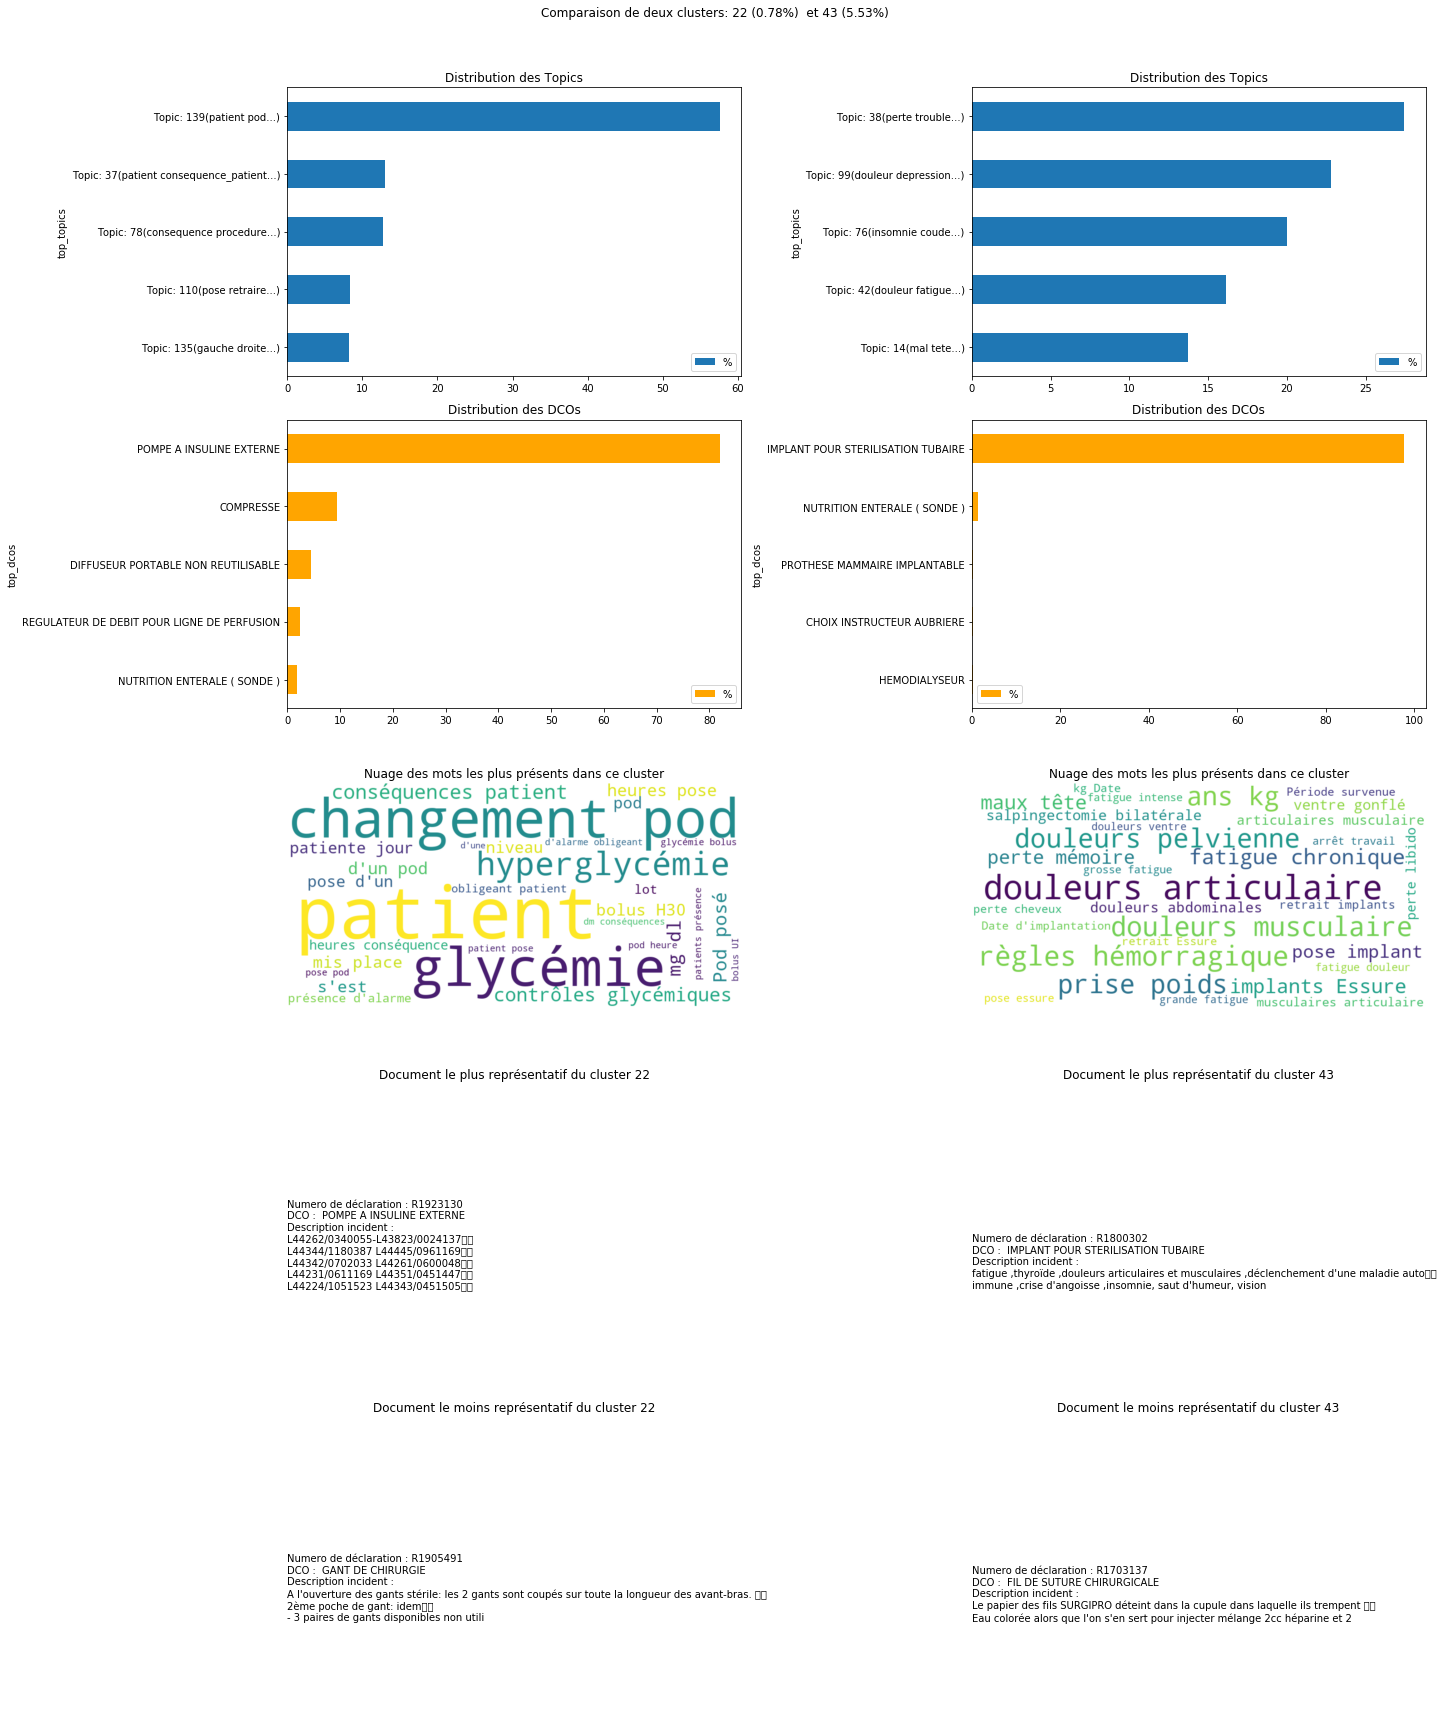

In [13]:
f = clustermodel.get_furthest()
print(' Les deux clusters les plus éloignés sont le cluster ',f[0][0], ' et le cluster' ,f[0][1])

clusteur_list = f[0]
analysis.plotCompareClusterAnalysis(f[0][0],f[0][1],topicmodel,clustermodel)

#### 2.4.2 Analyse des deux clusters les plus proches

 Les deux clusteurs les plus proches sont le cluster  5  et le cluster 43


/home/robin/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 13 missing from current font.



CPU times: user 12.2 s, sys: 181 ms, total: 12.4 s
Wall time: 12.2 s


/home/robin/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 13 missing from current font.



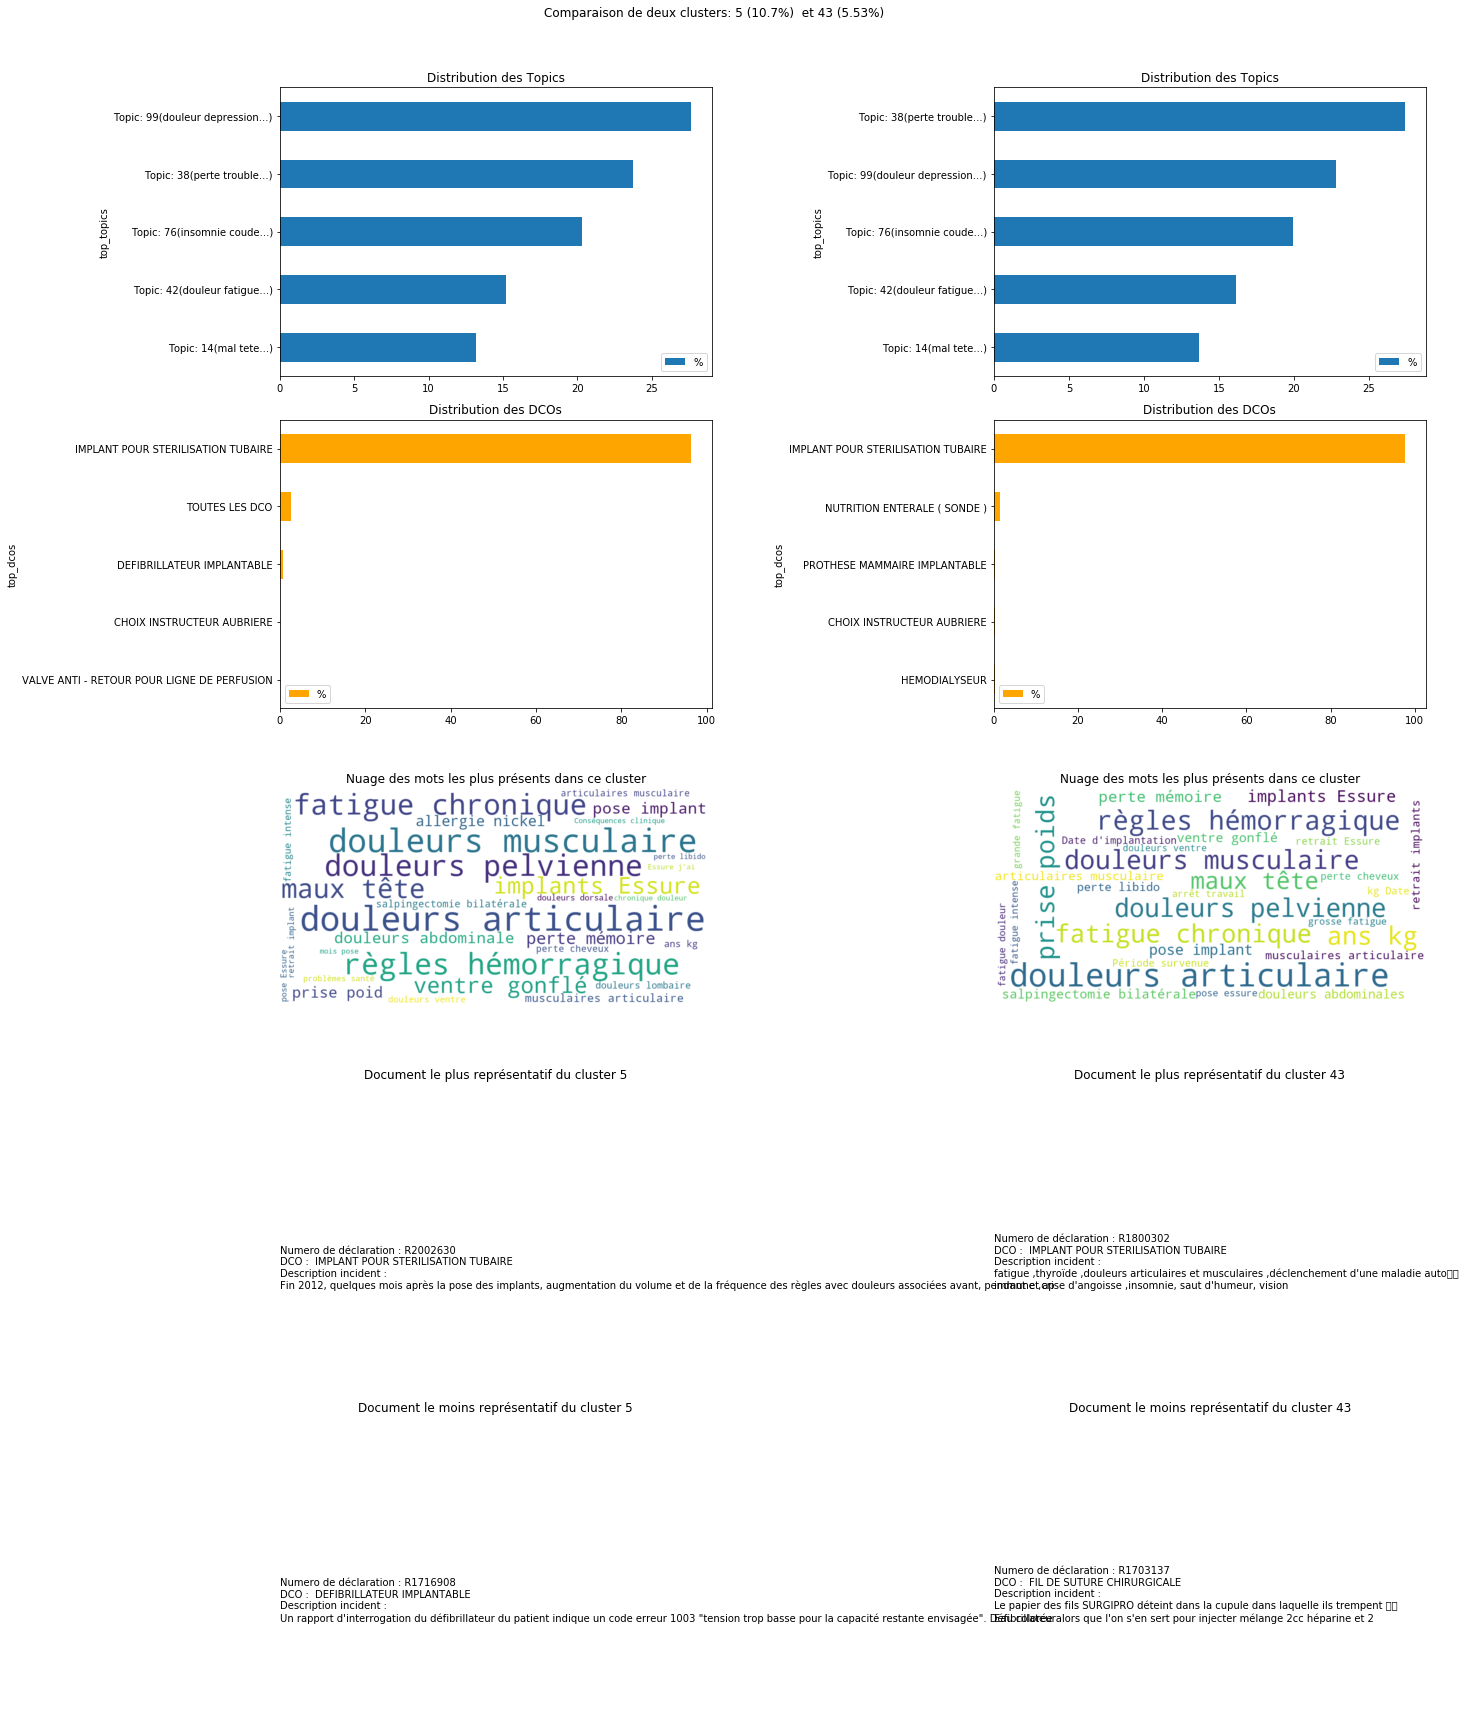

In [14]:
%%time
f = clustermodel.get_closest()
print(' Les deux clusteurs les plus proches sont le cluster ',f[0][0], ' et le cluster' ,f[0][1])

clusteur_list = f[0]
clusteur_list = f[0]
analysis.plotCompareClusterAnalysis(f[0][0],f[0][1],topicmodel,clustermodel)

### 3. Analyse par document <a class="anchor" id="doc-analysis"></a>

Numero de déclaration : R1916045
 DCO :  PMI : SILICONE TEXTUREE
 Description incident : 
Patiente : EST
Implants gauche et droit
Esthétique
Primo implantation : non
Signes d'appel clinique
Signes à l'échographie ou à l'IRM
Rupture
Coque III droite
Epanchement droite 
  Etat patient : 
..
Appartient au cluster numero : 55


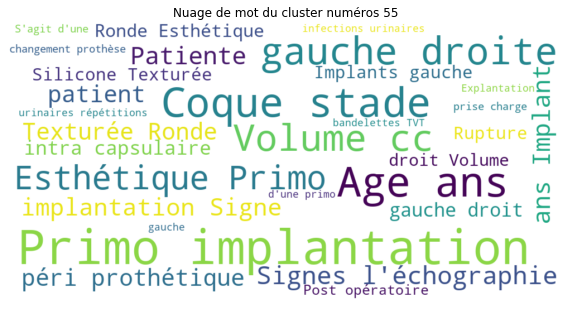

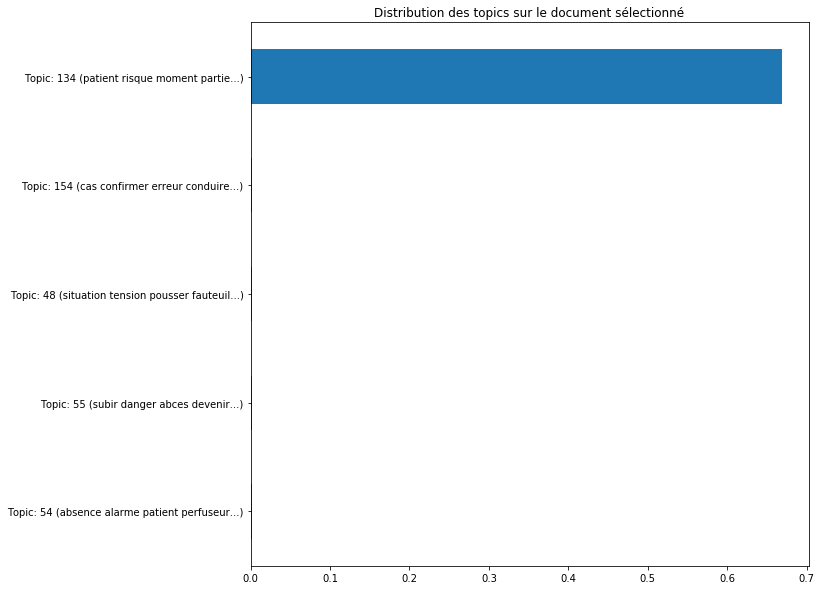

CPU times: user 1.41 s, sys: 32.9 ms, total: 1.45 s
Wall time: 1.44 s


In [15]:
%%time
doc_id = "R1916045"
analysis.plotDocumentAnalysis(doc_id,topicmodel,clustermodel,data_mrv)